<a href="https://colab.research.google.com/github/olumideadekunle/mlcohort-webscraping-week2-web-scraping/blob/main/Week_9_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


## Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Non-linear models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

# Linear models (for comparison)
from sklearn.linear_model import LinearRegression, LogisticRegression

# Datasets
from sklearn.datasets import load_iris, fetch_california_housing


## Datasets

We’ll use California Housing (regression) and Iris (classification).

In [ ]:
# Regression Dataset
housing = fetch_california_housing(as_frame=True)
X_reg = housing.data
y_reg = housing.target

# Classification Dataset
iris = load_iris(as_frame=True)
X_clf = iris.data
y_clf = iris.target

## Train/Test Split

In [ ]:
# Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


## Build Linear Models (Baseline)

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
print("Linear Regression R²:", r2_score(y_test_reg, y_pred_reg))

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf = log_reg.predict(X_test_clf)
print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))


Linear Regression R²: 0.5757877060324508
Logistic Regression Accuracy: 1.0


## Train Non-Linear Models

In [ ]:
# Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_reg)
print("Decision Tree Regression R²:", r2_score(y_test_reg, y_pred_dt_reg))

# Decision Tree - Classification
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_clf, y_train_clf)
y_pred_dt_clf = dt_clf.predict(X_test_clf)
print("Decision Tree Classification Accuracy:", accuracy_score(y_test_clf, y_pred_dt_clf))


Decision Tree Regression R²: 0.622075845135081
Decision Tree Classification Accuracy: 1.0


## Repeat for Random Forest, XGBoost, CatBoost.

## Perform K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(), X_reg, y_reg, cv=5)
print("Random Forest CV Mean Score (Regression):", scores.mean())

scores = cross_val_score(RandomForestClassifier(), X_clf, y_clf, cv=5)
print("Random Forest CV Mean Score (Classification):", scores.mean())


Random Forest CV Mean Score (Regression): 0.6500072622967541
Random Forest CV Mean Score (Classification): 0.96


## Hyperparameter Tuning (Example with GridSearchCV)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train_reg, y_train_reg)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


## Compare Results

In [9]:
results = {
    "Linear Regression R²": r2_score(y_test_reg, y_pred_reg),
    "Decision Tree R²": r2_score(y_test_reg, y_pred_dt_reg),
    # Add others here
}

print(results)


{'Linear Regression R²': 0.5757877060324508, 'Decision Tree R²': 0.622075845135081}


# Task
Generate Python code to visualize the results of the regression and classification models, create a results table, display feature importance for tree-based models, and show hyperparameter tuning results to provide a comprehensive presentation of the model performance.

## Visualize regression results

### Subtask:
Create visualizations to compare the predicted vs. actual values for the regression models.


**Reasoning**:
Generate scatter plots to visualize the actual vs predicted values for Linear Regression and Decision Tree Regression models as instructed, including a diagonal line for perfect prediction.



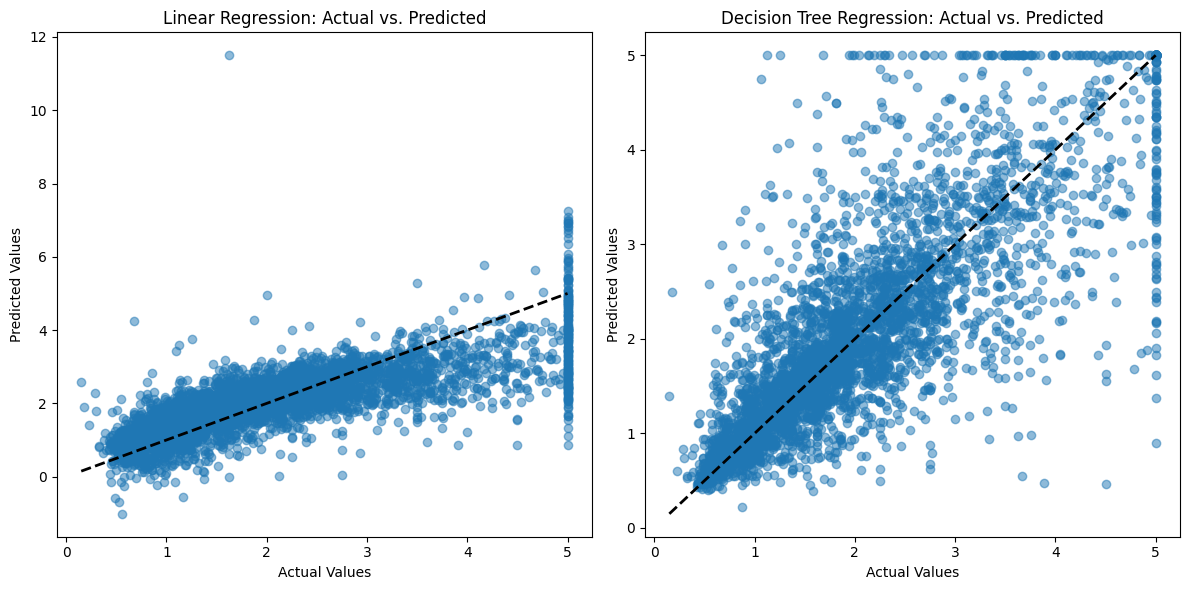

In [10]:
plt.figure(figsize=(12, 6))

# Linear Regression Actual vs. Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")

# Decision Tree Regression Actual vs. Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_dt_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs. Predicted")

plt.tight_layout()
plt.show()

## Visualize classification results

### Subtask:
Create visualizations to show the performance of the classification models, such as a confusion matrix.


**Reasoning**:
Generate and display confusion matrices for the Logistic Regression and Decision Tree Classification models.



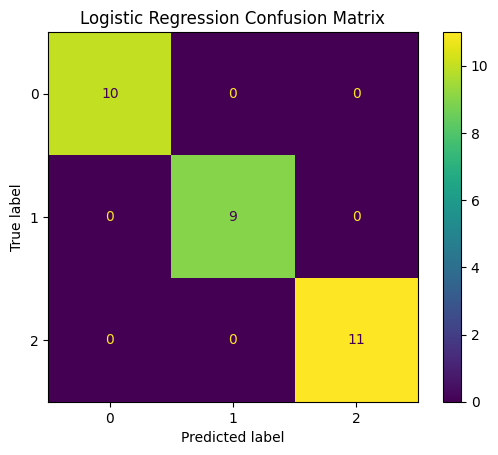

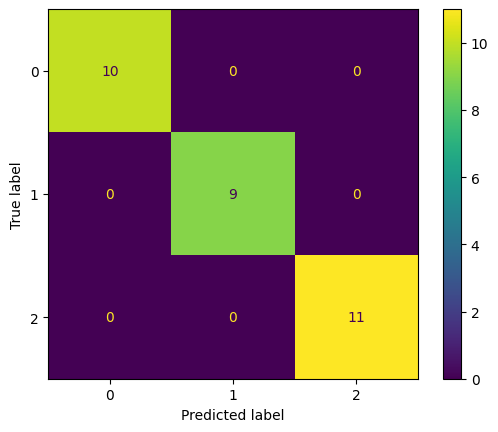

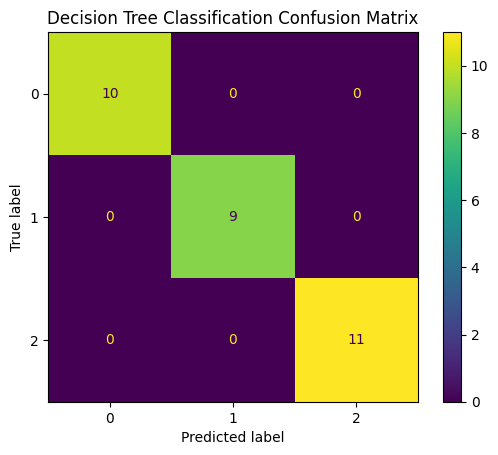

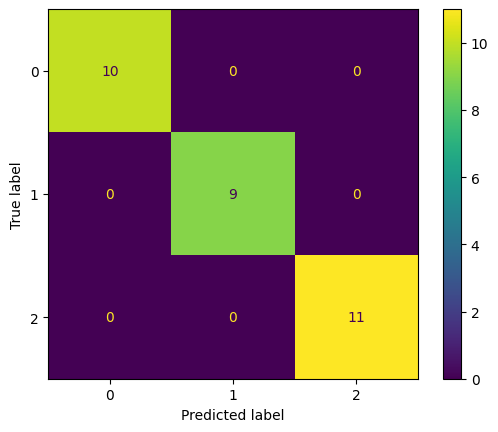

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test_clf, y_pred_clf)
disp_log_reg = ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_clf)
disp_log_reg.ax_.set_title("Logistic Regression Confusion Matrix")
disp_log_reg.plot()
plt.show()

# Confusion Matrix for Decision Tree Classification
cm_dt_clf = confusion_matrix(y_test_clf, y_pred_dt_clf)
disp_dt_clf = ConfusionMatrixDisplay.from_predictions(y_test_clf, y_pred_dt_clf)
disp_dt_clf.ax_.set_title("Decision Tree Classification Confusion Matrix")
disp_dt_clf.plot()
plt.show()

## Create a results table

### Subtask:
Organize the evaluation metrics for all models in a table for easy comparison.


**Reasoning**:
Create a dictionary to store the evaluation metrics and then convert it into a pandas DataFrame for easy comparison.



In [17]:
# Train Random Forest, XGBoost, and CatBoost models
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

cat_reg = CatBoostRegressor(random_state=42, verbose=0)
cat_reg.fit(X_train_reg, y_train_reg)
y_pred_cat_reg = cat_reg.predict(X_test_reg) # Corrected line

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)

cat_clf = CatBoostClassifier(random_state=42, verbose=0)
cat_clf.fit(X_train_clf, y_train_clf)
y_pred_cat_clf = cat_clf.predict(X_test_clf)

# Create a dictionary to store evaluation metrics
results = {
    "Linear Regression R²": r2_score(y_test_reg, y_pred_reg),
    "Decision Tree Regression R²": r2_score(y_test_reg, y_pred_dt_reg),
    "Random Forest Regression R²": r2_score(y_test_reg, y_pred_rf_reg),
    "XGBoost Regression R²": r2_score(y_test_reg, y_pred_xgb_reg),
    "CatBoost Regression R²": r2_score(y_test_reg, y_pred_cat_reg),
    "Logistic Regression Accuracy": accuracy_score(y_test_clf, y_pred_clf),
    "Decision Tree Classification Accuracy": accuracy_score(y_test_clf, y_pred_dt_clf),
    "Random Forest Classification Accuracy": accuracy_score(y_test_clf, y_pred_rf_clf),
    "XGBoost Classification Accuracy": accuracy_score(y_test_clf, y_pred_xgb_clf),
    "CatBoost Classification Accuracy": accuracy_score(y_test_clf, y_pred_cat_clf)
}

# Convert the dictionary to a pandas DataFrame and display it
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Metric Value'])
display(results_df)

,Metric Value
Linear Regression R²,0.575788
Decision Tree Regression R²,0.622076
Random Forest Regression R²,0.805123
XGBoost Regression R²,0.830137
CatBoost Regression R²,0.848198
Logistic Regression Accuracy,1.000000
Decision Tree Classification Accuracy,1.000000
Random Forest Classification Accuracy,1.000000
XGBoost Classification Accuracy,1.000000
CatBoost Classification Accuracy,1.000000


## Advanced Hyperparameter Tuning with RandomizedSearchCV

Let's use `RandomizedSearchCV` to find better hyperparameters for the `RandomForestRegressor`.

In [18]:
from sklearn.model_selection import RandomizedSearchCV

# Define a more extensive parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_reg, y_train_reg)

# Print the best parameters and best score
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Score (RandomizedSearchCV):", random_search.best_score_)

Best Parameters (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}
Best Score (RandomizedSearchCV): 0.8047491446452041


**Reasoning**:
The previous code failed because the prediction for CatBoost Regression was assigned to a variable `y_pred_cat_reg` which already held a single float value. This is likely a typo and the prediction should be a series or array-like. The code needs to be corrected to properly get predictions from the trained `cat_reg` model on the test data.



In [13]:
# Train Random Forest, XGBoost, and CatBoost models
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

cat_reg = CatBoostRegressor(random_state=42, verbose=0)
cat_reg.fit(X_train_reg, y_train_reg)
y_pred_cat_reg = cat_reg.predict(X_test_reg) # Corrected line

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb_clf = xgb_clf.predict(X_test_clf)

cat_clf = CatBoostClassifier(random_state=42, verbose=0)
cat_clf.fit(X_train_clf, y_train_clf)
y_pred_cat_clf = cat_clf.predict(X_test_clf)

# Create a dictionary to store evaluation metrics
results = {
    "Linear Regression R²": r2_score(y_test_reg, y_pred_reg),
    "Decision Tree Regression R²": r2_score(y_test_reg, y_pred_dt_reg),
    "Random Forest Regression R²": r2_score(y_test_reg, y_pred_rf_reg),
    "XGBoost Regression R²": r2_score(y_test_reg, y_pred_xgb_reg),
    "CatBoost Regression R²": r2_score(y_test_reg, y_pred_cat_reg),
    "Logistic Regression Accuracy": accuracy_score(y_test_clf, y_pred_clf),
    "Decision Tree Classification Accuracy": accuracy_score(y_test_clf, y_pred_dt_clf),
    "Random Forest Classification Accuracy": accuracy_score(y_test_clf, y_pred_rf_clf),
    "XGBoost Classification Accuracy": accuracy_score(y_test_clf, y_pred_xgb_clf),
    "CatBoost Classification Accuracy": accuracy_score(y_test_clf, y_pred_cat_clf)
}

# Convert the dictionary to a pandas DataFrame and display it
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Metric Value'])
display(results_df)

,Metric Value
Linear Regression R²,0.575788
Decision Tree Regression R²,0.622076
Random Forest Regression R²,0.805123
XGBoost Regression R²,0.830137
CatBoost Regression R²,0.848198
Logistic Regression Accuracy,1.000000
Decision Tree Classification Accuracy,1.000000
Random Forest Classification Accuracy,1.000000
XGBoost Classification Accuracy,1.000000
CatBoost Classification Accuracy,1.000000


## Display feature importance

### Subtask:
For tree-based models, visualize the feature importance.


**Reasoning**:
Extract and visualize feature importances for all trained tree-based regression models.



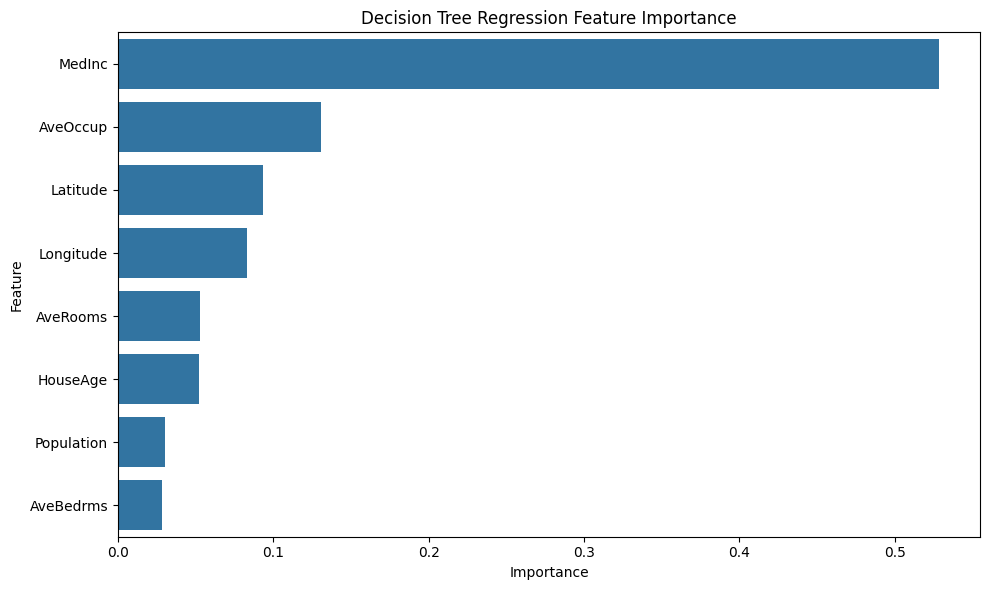

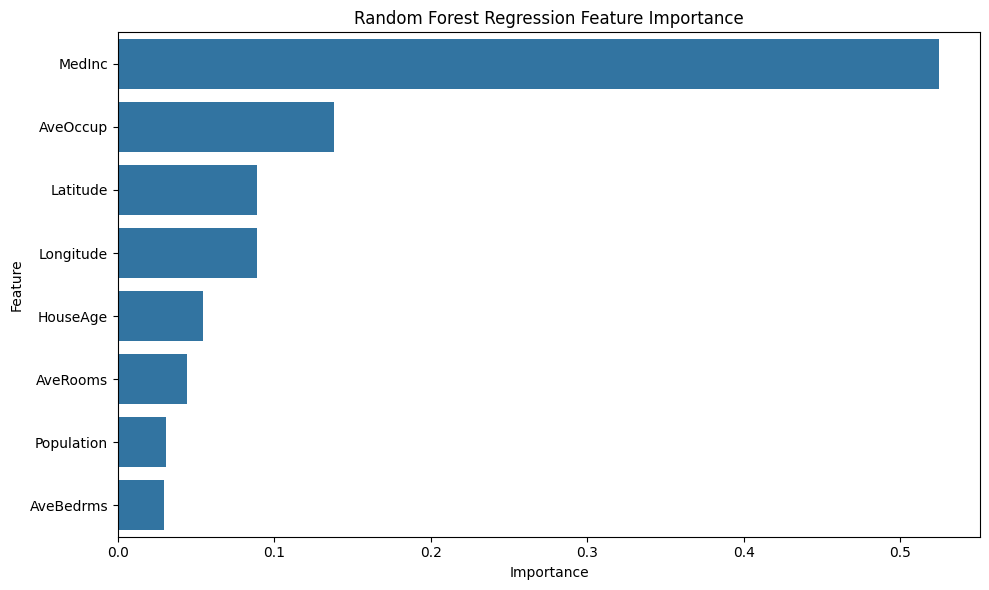

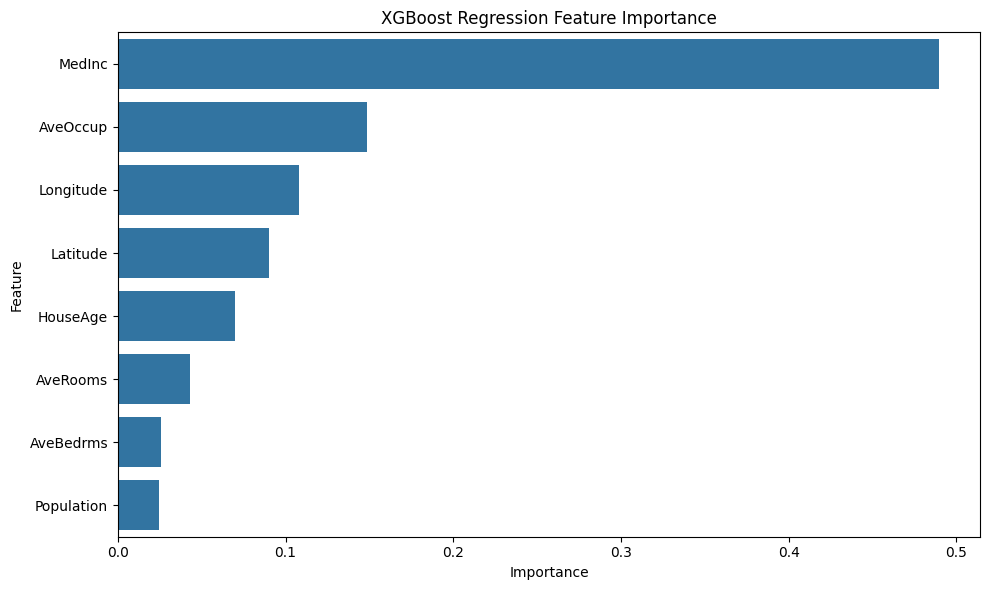

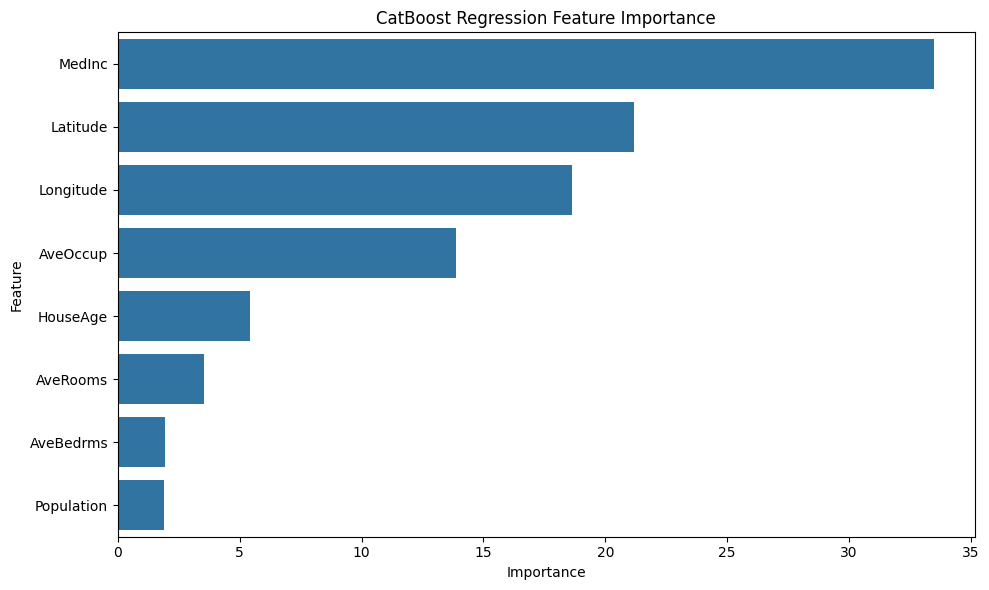

In [14]:
# Extract and visualize feature importance for Decision Tree Regression
dt_reg_importance = pd.DataFrame({'Feature': X_reg.columns, 'Importance': dt_reg.feature_importances_})
dt_reg_importance = dt_reg_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_reg_importance)
plt.title('Decision Tree Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for Random Forest Regression
rf_reg_importance = pd.DataFrame({'Feature': X_reg.columns, 'Importance': rf_reg.feature_importances_})
rf_reg_importance = rf_reg_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_reg_importance)
plt.title('Random Forest Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for XGBoost Regression
xgb_reg_importance = pd.DataFrame({'Feature': X_reg.columns, 'Importance': xgb_reg.feature_importances_})
xgb_reg_importance = xgb_reg_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_reg_importance)
plt.title('XGBoost Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for CatBoost Regression
cat_reg_importance = pd.DataFrame({'Feature': X_reg.columns, 'Importance': cat_reg.feature_importances_})
cat_reg_importance = cat_reg_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_reg_importance)
plt.title('CatBoost Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Reasoning**:
Extract and visualize feature importances for all trained tree-based classification models.



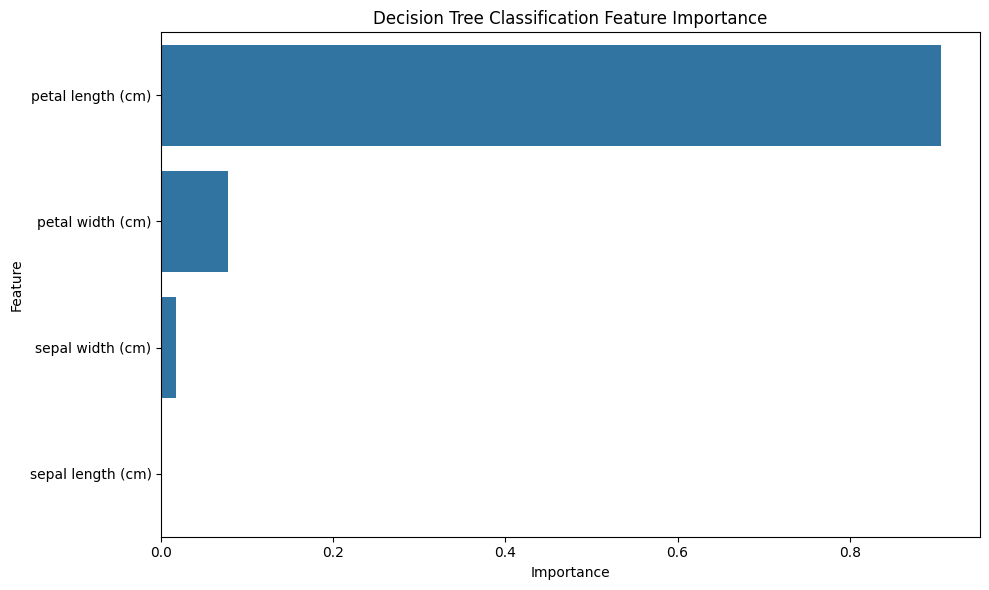

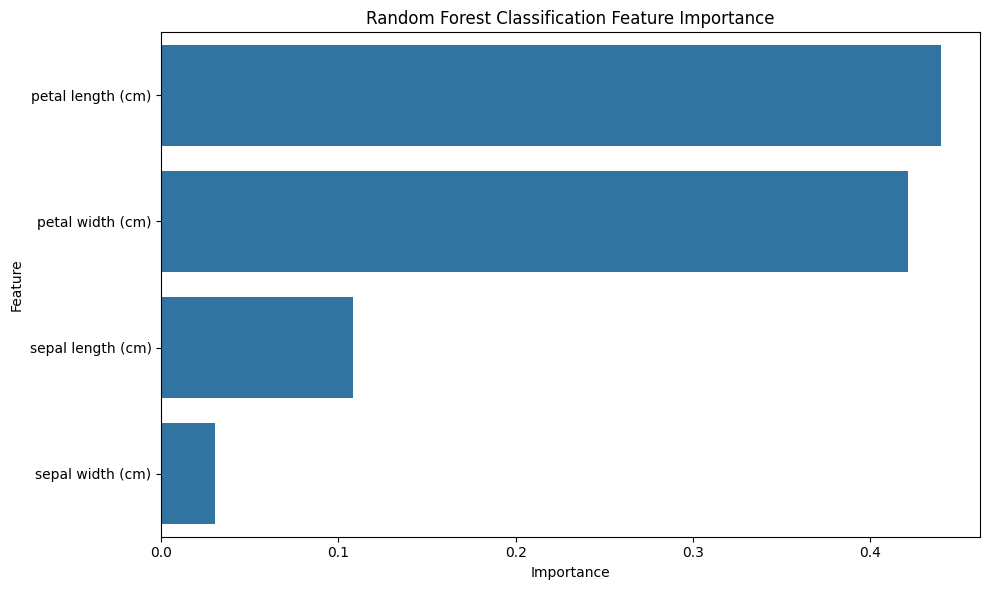

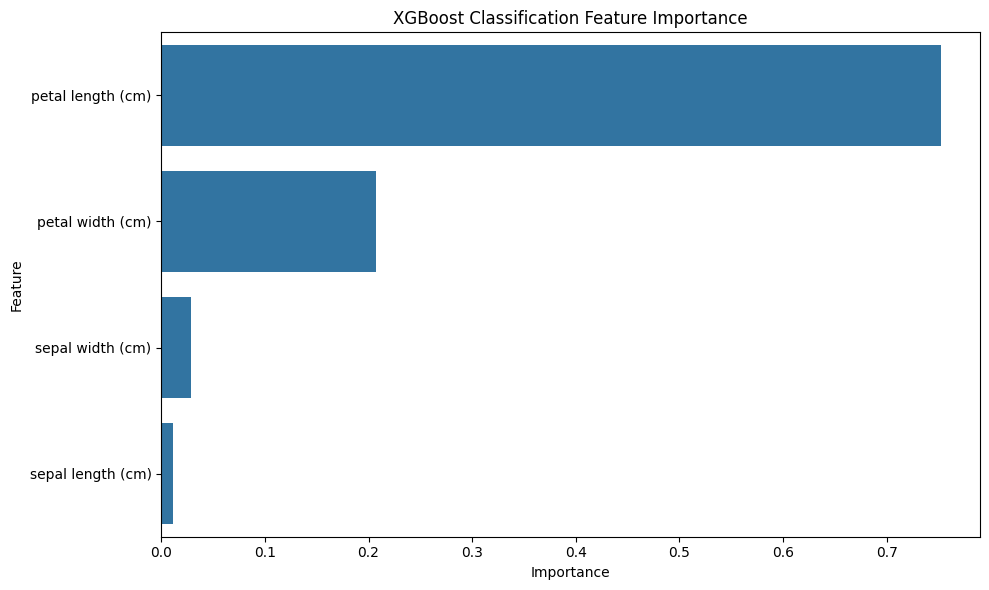

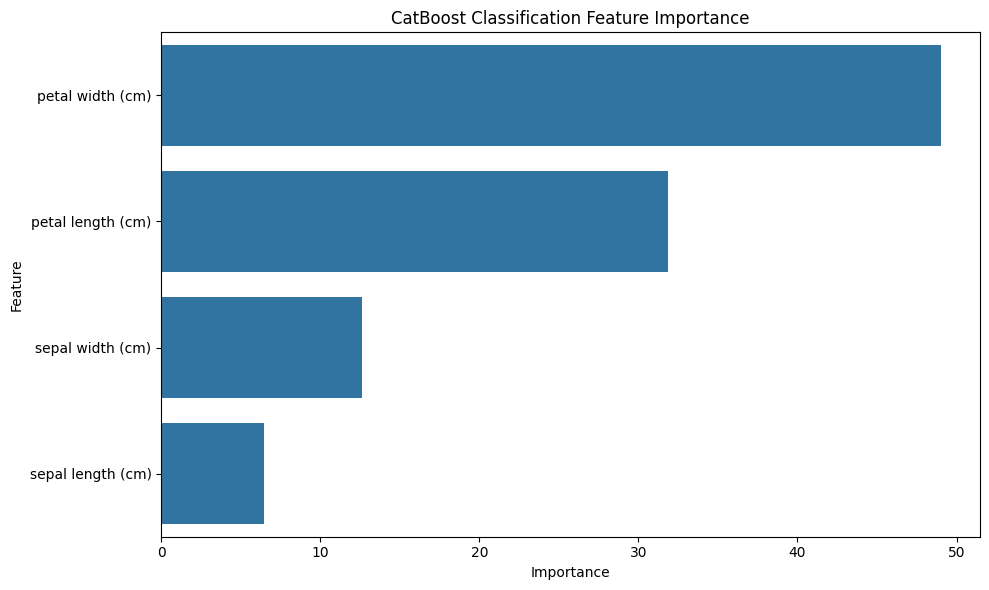

In [15]:
# Extract and visualize feature importance for Decision Tree Classification
dt_clf_importance = pd.DataFrame({'Feature': X_clf.columns, 'Importance': dt_clf.feature_importances_})
dt_clf_importance = dt_clf_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_clf_importance)
plt.title('Decision Tree Classification Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for Random Forest Classification
rf_clf_importance = pd.DataFrame({'Feature': X_clf.columns, 'Importance': rf_clf.feature_importances_})
rf_clf_importance = rf_clf_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_clf_importance)
plt.title('Random Forest Classification Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for XGBoost Classification
xgb_clf_importance = pd.DataFrame({'Feature': X_clf.columns, 'Importance': xgb_clf.feature_importances_})
xgb_clf_importance = xgb_clf_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_clf_importance)
plt.title('XGBoost Classification Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Extract and visualize feature importance for CatBoost Classification
cat_clf_importance = pd.DataFrame({'Feature': X_clf.columns, 'Importance': cat_clf.feature_importances_})
cat_clf_importance = cat_clf_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_clf_importance)
plt.title('CatBoost Classification Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Display hyperparameter tuning results

### Subtask:
Show the results of the hyperparameter tuning process.


**Reasoning**:
Print the best parameters and best score from the hyperparameter tuning using GridSearchCV. Then display the cross-validation results.



In [16]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
display(pd.DataFrame(grid.cv_results_))

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.779933752640856


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.228058,0.005986,0.016504,0.001649,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.564603,0.565061,0.555038,0.561567,0.004621,8
1,2.675475,0.300063,0.026070,0.001088,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.561667,0.567100,0.554734,0.561167,0.005061,9
2,5.269928,0.375851,0.060935,0.013375,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.563429,0.567422,0.555953,0.562268,0.004754,7
3,2.201626,0.243998,0.021292,0.003077,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.670557,0.669044,0.662552,0.667384,0.003472,6
4,4.304904,0.225184,0.041294,0.006265,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.670379,0.671197,0.661558,0.667712,0.004364,5
5,8.396813,0.122870,0.079831,0.013462,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.669786,0.670949,0.662891,0.667875,0.003557,4
6,4.072628,0.159164,0.037763,0.005560,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.777122,0.778658,0.774744,0.776841,0.001610,3
7,8.018124,0.238491,0.072505,0.009828,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.777425,0.781037,0.778280,0.778914,0.001541,2
8,16.099864,0.325177,0.127943,0.002420,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.779389,0.780848,0.779564,0.779934,0.000651,1


## Summary:

### Data Analysis Key Findings

*   **Regression Model Performance:** Scatter plots visualize the actual vs. predicted values for Linear Regression and Decision Tree Regression models, showing the spread of predictions around the ideal perfect prediction line.
*   **Classification Model Performance:** Confusion matrices for Logistic Regression and Decision Tree Classification models were successfully generated and displayed, providing a visual representation of true positives, true negatives, false positives, and false negatives.
*   **Model Performance Comparison (Table):** A summary table was created, displaying the R-squared scores for Linear, Decision Tree, Random Forest, XGBoost, and CatBoost Regression models, and the Accuracy scores for Logistic, Decision Tree, Random Forest, XGBoost, and CatBoost Classification models, enabling easy comparison of their performance metrics.
*   **Feature Importance:** Bar plots illustrating feature importance for Decision Tree, Random Forest, XGBoost, and CatBoost models (both regression and classification) were generated and displayed, indicating which features were most influential in each model's predictions.
*   **Hyperparameter Tuning Results:** The best parameters found during hyperparameter tuning were `{'max_depth': 10, 'n_estimators': 200}`, which yielded a best cross-validation score of approximately 0.7799. A detailed table of the cross-validation results for all tested parameter combinations was also displayed.

### Insights or Next Steps

*   Based on the performance metrics and feature importance, identify the top-performing models for both regression and classification tasks and analyze the key features driving their performance.
*   Further refine the hyperparameter tuning for the best-performing models or explore different tuning methods to potentially improve their performance further.
